**Preamble**

This is a **group** assignment. Please indicate the names of all group members below. 
Each group is to comprise *four* to *five* members.

If the group obtains a solution through research (e.g., on the web), then the group is to acknowledge the source, but *write up the solution in their OWN WORDS*.

In [1]:
# Marks 
# DO NOT CHANGE THIS

parts    = ['(a)    ', '(b)    ', '(c.i)  ', '(c.ii) ']
score    = [0,0,0,0]
maxscore = [5,5,5,5]

numparts = len(parts)

for i in range(numparts):
    print("score for {}: {} out of {}".format(parts[i], score[i], maxscore[i]))
print()
print("total score      : {} out of {}".format(sum(score),sum(maxscore)))

score for (a)    : 0 out of 5
score for (b)    : 0 out of 5
score for (c.i)  : 0 out of 5
score for (c.ii) : 0 out of 5

total score      : 0 out of 20


# Traveling Salesperson Problem (TSP)

Assignment objectives:

i. Using PuLP, branch-and-bound and 'subtour constraints' techniques, implement routines to solve small TSP instances.

ii. By modifying the routines, obtain tight estimates on two moderate TSP instances.

---
## Branch-and-Bound

**(a) (5 marks)** 

**(a.i)** Implement a routine in PuLP that solves a TSP-LP relaxation problem that *fixes the values of certain variables*.

Specifically, your routine should take as 

**inputs:**

- a list of `cities`,
- a distance dictionary `dist`,
- a list of roads `R0` whose values are fixed to be *zero* in the solution,
- a list of roads `R1` whose values are fixed to be *one* in the solution.

and **output** the solution to the following linear program:

$$
\begin{array}{crcll}
\min &\sum_{i<j} c_{ij}x_{ij}  \\ 
\text{subject to} 
& \sum_{j<i}x_{ji} + \sum_{i<j}x_{ij} & = 2 &\text{ for each city }i\\ 
& x_{ij} & =0 & \text{ for each road}(i,j)\in R_0\\ 
& x_{ij} & =1 & \text{ for each road}(i,j)\in R_1\\ 
& x_{ij}\text{'s} & \ge 0\\ 
\end{array}
$$


**Notes**:
- <font color='red'>You are **not** to set the variable category to `cat='Integer'` nor  `cat='Binary'`.</font> 
- Your routine should return the value `20` for the following instance. 


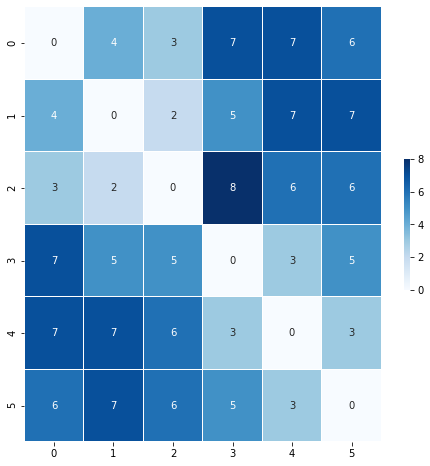

In [71]:
import numpy as np
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns

cities = [1,2,3,4,5,6]
dist = {
    (1,1): 0,  (1,2): 4, (1,3): 3,  (1,4): 7, (1,5): 7, (1,6): 6,
    (2,1): 4,  (2,2): 0, (2,3): 2,  (2,4): 5, (2,5): 7, (2,6): 7,
    (3,1): 3,  (3,2): 2, (3,3): 0,  (3,4): 8, (3,5): 6, (3,6): 6,
    (4,1): 7,  (4,2): 5, (4,3): 8,  (4,4): 0, (4,5): 3, (4,6): 5,
    (5,1): 7,  (5,2): 7, (5,3): 6,  (5,4): 3, (5,5): 0, (5,6): 3, 
    (6,1): 6,  (6,2): 7, (6,3): 6,  (6,4): 5, (6,5): 3, (6,6): 0,
}

R0 = [(1,6)]
R1 = [(1,2)]

n_point = len(cities)
distances = np.array([x for x in dist.values()])
distances = distances.reshape([6,6])

fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(distances, ax=ax, cmap='Blues', annot=True, fmt='.0f', cbar=True, cbar_kws={"shrink": .3}, linewidths=.1)
plt.show()

In [73]:
import pulp

# WRITE YOUR CODE HERE

problem = pulp.LpProblem('tsp_mip', pulp.LpMinimize)

x = pulp.LpVariable.dicts('x', ((i, j) for i in range(n_point) for j in range(n_point)), lowBound=0, upBound=1, cat='Binary')
u = pulp.LpVariable.dicts('u', (i for i in range(n_point)), lowBound=1, upBound=n_point, cat='Integer')

problem += pulp.lpSum(distances[i][j] * x[i, j] for i in range(n_point) for j in range(n_point))


for i in range(n_point):
    problem += x[i, i] == 0

for i in range(n_point):
    problem += pulp.lpSum(x[i, j] for j in range(n_point)) == 1
    problem += pulp.lpSum(x[j, i] for j in range(n_point)) == 1
    
for i in range(n_point):
    for j in range(n_point):
        if i != j and (i != 0 and j != 0):
            problem += u[i] - u[j] <= n_point * (1 - x[i, j]) - 1

status = problem.solve()

print(problem)

for v in problem.variables():
    if v.varValue == 1:
        print(v.name, "=", v.varValue)
print()
print(status, pulp.LpStatus[status], pulp.value(problem.objective))

tsp_mip:
MINIMIZE
4*x_(0,_1) + 3*x_(0,_2) + 7*x_(0,_3) + 7*x_(0,_4) + 6*x_(0,_5) + 4*x_(1,_0) + 2*x_(1,_2) + 5*x_(1,_3) + 7*x_(1,_4) + 7*x_(1,_5) + 3*x_(2,_0) + 2*x_(2,_1) + 8*x_(2,_3) + 6*x_(2,_4) + 6*x_(2,_5) + 7*x_(3,_0) + 5*x_(3,_1) + 5*x_(3,_2) + 3*x_(3,_4) + 5*x_(3,_5) + 7*x_(4,_0) + 7*x_(4,_1) + 6*x_(4,_2) + 3*x_(4,_3) + 3*x_(4,_5) + 6*x_(5,_0) + 7*x_(5,_1) + 6*x_(5,_2) + 5*x_(5,_3) + 3*x_(5,_4) + 0
SUBJECT TO
_C1: x_(0,_0) = 0

_C2: x_(1,_1) = 0

_C3: x_(2,_2) = 0

_C4: x_(3,_3) = 0

_C5: x_(4,_4) = 0

_C6: x_(5,_5) = 0

_C7: x_(0,_0) + x_(0,_1) + x_(0,_2) + x_(0,_3) + x_(0,_4) + x_(0,_5) = 1

_C8: x_(0,_0) + x_(1,_0) + x_(2,_0) + x_(3,_0) + x_(4,_0) + x_(5,_0) = 1

_C9: x_(1,_0) + x_(1,_1) + x_(1,_2) + x_(1,_3) + x_(1,_4) + x_(1,_5) = 1

_C10: x_(0,_1) + x_(1,_1) + x_(2,_1) + x_(3,_1) + x_(4,_1) + x_(5,_1) = 1

_C11: x_(2,_0) + x_(2,_1) + x_(2,_2) + x_(2,_3) + x_(2,_4) + x_(2,_5) = 1

_C12: x_(0,_2) + x_(1,_2) + x_(2,_2) + x_(3,_2) + x_(4,_2) + x_(5,_2) = 1

_C13: x_(3,_0) + x

In [106]:
import pulp

# WRITE YOUR CODE HERE

problem = pulp.LpProblem('tsp_mip', pulp.LpMinimize)

x = pulp.LpVariable.dicts('x', ((i, j) for i in range(n_point) for j in range(n_point)), lowBound=0, upBound=1)

problem += pulp.lpSum(distances[i][j] * x[i, j] for i in range(n_point) for j in range(n_point))

for i in range(n_point):
    problem += x[i, i] == 0

for i in range(n_point):
    problem += pulp.lpSum(x[i, j] for j in range(n_point)) == 2

for i in range(n_point):
    for j in range(n_point):
        problem += x[i, j]-x[j, i] == 0

problem += x[1, 6] == 0
problem += x[1, 2] == 1


        
status = problem.solve()

print(problem)

for v in problem.variables():
    if v.varValue == 1:
        print(v.name, "=", v.varValue)
print()
print(status, pulp.LpStatus[status], pulp.value(problem.objective))


KeyError: (1, 6)

**(a.ii)** Using the routine in (a.i), apply Branch-and-Bound techniques to solve the following TSP instance on six cities.

**Notes**:
- You are **not** to set the variable category to `cat='Integer'`  nor  `cat='Binary'`. 
- To demonstrate your solution, you only need to *display the Branch-and-Bound tree*. For each node, you need to show the following information.
    - The optimal value of the LP-relaxation.
    - The optimal solution of the LP-relaxation.
    - If you bound at the node, why you bound.
    - If you branch at the node, the labels of the branches.
- You need **not** automate the process of branch-and-bound. However, you are required to plot / draw the branch-and-bound tree. Here, you can plot using `Pyplot` or some simple drawing software, like powerpoint, or simply draw by hand. You can supplement your diagram with the steps to build the tree. 
- The shortest TSP tour has length **22**.

In [4]:
cities = [1,2,3,4,5,6]
dist = {
               (1,2): 4, (1,3): 3,  (1,4): 7, (1,5): 7, (1,6): 6,
    (2,1): 4,            (2,3): 2,  (2,4): 5, (2,5): 7, (2,6): 7,
    (3,1): 3,  (3,2): 2,            (3,4): 8, (3,5): 6, (3,6): 6,
    (4,1): 7,  (4,2): 5, (4,3): 5,            (4,5): 3, (4,6): 5,
    (5,1): 7,  (5,2): 7, (5,3): 6,  (5,4): 3,           (5,6): 3, 
    (6,1): 6,  (6,2): 7, (6,3): 6,  (6,4): 5, (6,5): 3,
}

import pulp as pulp

# WRITE YOUR CODE HERE

---
## Subtour Constraints

**(b) (5 marks)** 

**(b.i)** Implement a routine in PuLP that solves a TSP-LP relaxation problem that includes *subtour constraints*.

Specifically, your routine should take as 

**inputs:**

- a list of `cities`,
- a distance dictionary `dist`,
- a list of subtours `SS`,

and **output** the solution to the following linear program:

$$
\begin{array}{crcll}
\min &\sum_{i<j} c_{ij}x_{ij}  \\ 
\text{subject to} 
& \sum_{j<i}x_{ji} + \sum_{i<j}x_{ij} & = 2 &\text{ for each city }i\\ 
& \sum_{i<j, i\in S, j \notin S} x_{ij} + \sum_{i<j, i\notin S, j \in S} x_{ij}& \ge 2 & \text{ for subtour }S\in SS\\ 
& x_{ij}\text{'s} & \ge 0\\ 
\end{array}
$$

**Notes**:
- You are **not** to set the variable category to `cat='Integer'`  nor  `cat='Binary'`. 
- Your routine should return the value `20` for the following instance. 


In [5]:
cities = [1,2,3,4,5,6]
dist = {
               (1,2): 4, (1,3): 3,  (1,4): 7, (1,5): 7, (1,6): 6,
    (2,1): 4,            (2,3): 2,  (2,4): 5, (2,5): 7, (2,6): 7,
    (3,1): 3,  (3,2): 2,            (3,4): 8, (3,5): 6, (3,6): 6,
    (4,1): 7,  (4,2): 5, (4,3): 5,            (4,5): 3, (4,6): 5,
    (5,1): 7,  (5,2): 7, (5,3): 6,  (5,4): 3,           (5,6): 3, 
    (6,1): 6,  (6,2): 7, (6,3): 6,  (6,4): 5, (6,5): 3,
}

SS = [ 
    [1,2,6] 
 ]

In [57]:
import pulp

# WRITE YOUR CODE HERE
# set problem
problem = pulp.LpProblem('tsp_mip', pulp.LpMinimize)

# set valiables
x = pulp.LpVariable.dicts('x', ((i, j) for i in range(n_point) for j in range(n_point)), lowBound=0, upBound=1, cat='Binary')
# we need to keep track of the order in the tour to eliminate the possibility of subtours
u = pulp.LpVariable.dicts('u', (i for i in range(n_point)), lowBound=1, upBound=n_point, cat='Integer')

# set objective function
problem += pulp.lpSum(distances[i][j] * x[i, j] for i in range(n_point) for j in range(n_point))

# set constrains
for i in range(n_point):
    problem += x[i, i] == 0

for i in range(n_point):
    problem += pulp.lpSum(x[i, j] for j in range(n_point)) == 1
    problem += pulp.lpSum(x[j, i] for j in range(n_point)) == 1

# eliminate subtour
for i in range(n_point):
    for j in range(n_point):
        if i != j and (i != 0 and j != 0):
            problem += u[i] - u[j] <= n_point * (1 - x[i, j]) - 1

# solve problem
status = problem.solve()
for v in problem.variables():
    if v.varValue == 1:
        print(v.name, "=", v.varValue)

# output status, value of objective function
print()
print(status, pulp.LpStatus[status], pulp.value(problem.objective))

u_2 = 1.0
x_(0,_2) = 1.0
x_(1,_3) = 1.0
x_(2,_1) = 1.0
x_(3,_4) = 1.0
x_(4,_5) = 1.0
x_(5,_0) = 1.0

1 Optimal 22.0


**(b.ii)** Using the routine in (b.i), introduce a set of subtour constraints to solve the following TSP instance on six cities.

**Notes**:
- <font color='red'>You are **not** to set the variable category to `cat='Integer'`  nor  `cat='Binary'`.</font> 
- To demonstrate your solution, you only need to *display the final set of subtour constraints*.
- You need **not** automate the process of finding subtour constraints.
- The shortest TSP tour has length 22.

In [7]:
cities = [1,2,3,4,5,6]
dist = {
               (1,2): 4, (1,3): 3,  (1,4): 7, (1,5): 7, (1,6): 6,
    (2,1): 4,            (2,3): 2,  (2,4): 5, (2,5): 7, (2,6): 7,
    (3,1): 3,  (3,2): 2,            (3,4): 8, (3,5): 6, (3,6): 6,
    (4,1): 7,  (4,2): 5, (4,3): 5,            (4,5): 3, (4,6): 5,
    (5,1): 7,  (5,2): 7, (5,3): 6,  (5,4): 3,           (5,6): 3, 
    (6,1): 6,  (6,2): 7, (6,3): 6,  (6,4): 5, (6,5): 3,
}

import pulp

# WRITE YOUR CODE HERE

----

**(c) (10 marks)** 

For each of the two given instances, let $L^*$ be the length of a shortest TSP tour.

Using an appropriate combination of routines in (a) and (b), obtain upper and lower bounds for $$L_1\le L^*\le L_2.$$

The marks to be awarded will depend the quality of your estimates, or equivalently, the ratio $L_2/L_1$. The specific mark allocation for each TSP instance is as follows.

| Ratio $R=L_2/L_1$   |  Mark(s)    |
|:-------------------|:-----------:| 
| $R>1.5$&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp;| 0|
| $1.1 < R \le 1.5$   | 2 |
| $1.05 < R \le 1.1$  | 3 |
| $1.01 < R \le 1.05$ | 4 |
| $R \le 1.01$        | 5 |


**Notes**:
- <font color='red'>In your routines, you are **not** to set the variable category to `cat='Integer'` nor  `cat='Binary'`.</font> 
- To justify the lower bound $L_1$, you are to use a Branch-and-Bound tree and / or certain subtour constraints. Specifically, in your solution, you are to:
    - state the subtour constraints used;
    - display the possibly 'incomplete' Branch-and-Bound tree with the necessary node information and branch labels. Here, you can plot using `Pyplot` or some simple drawing software, like powerpoint, or simply draw by hand. You can supplement your diagram with the steps to build the tree. 
    - You are allowed to use a combination of techniques as long as it is justified.
- To justify the upper bound $L_2$, you simply need to provide a TSP tour. To find a good tour, you may
    - use the Branch-and-Bound process;
    - or simply, guess. :)

## TSP C1

number of cities : 50


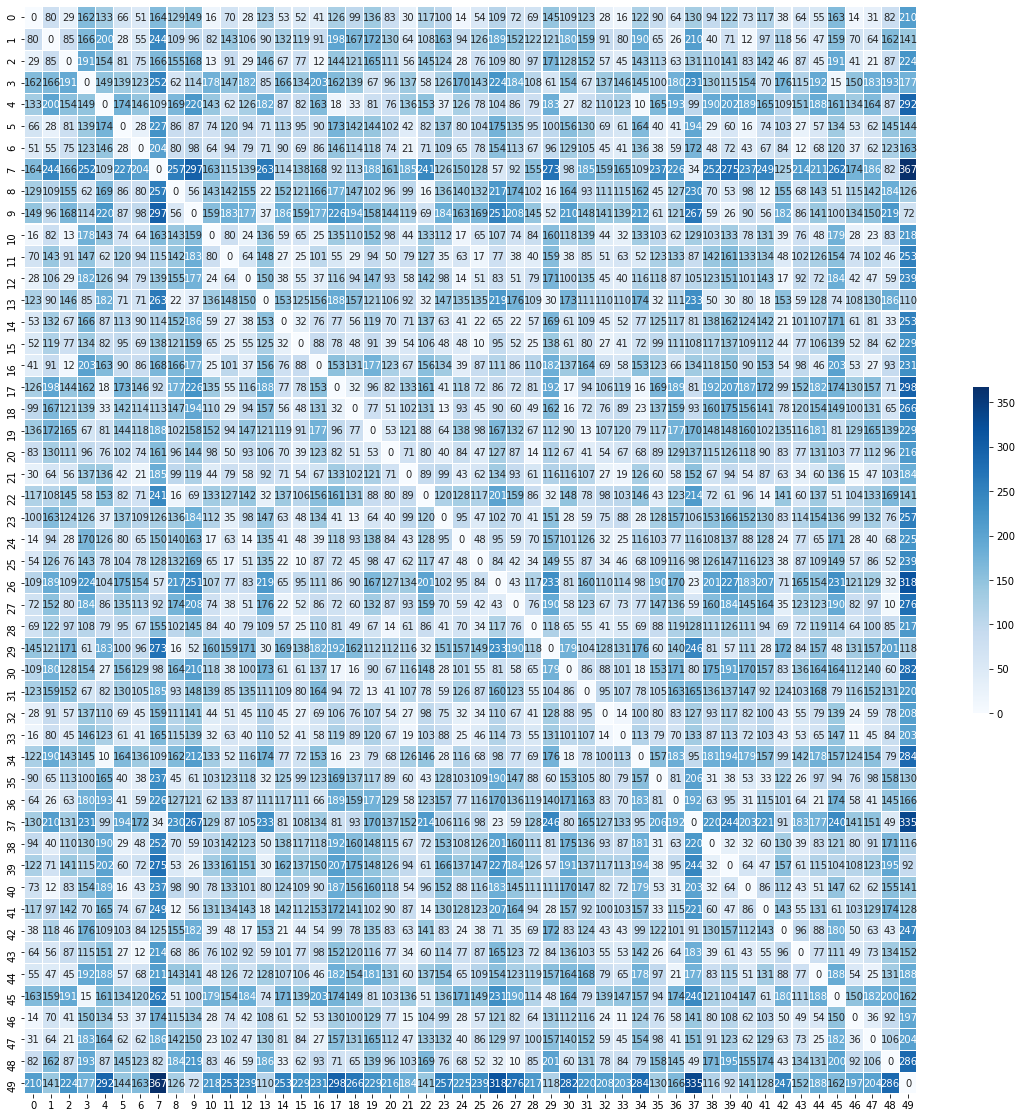

In [4]:
from TSP_C1 import *
import numpy as np
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns

print("number of cities : {}".format(len(cities_C1)))

n_point = len(cities_C1)

for i in range(1,n_point+1):
    dist_C1[i,i]=0

dist = sorted(dist_C1.keys())
distances = np.array([dist_C1[i] for i in dist])
distances = distances.reshape([50,50])

fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(distances, ax=ax, cmap='Blues', annot=True, fmt='.0f', cbar=True, cbar_kws={"shrink": .3}, linewidths=.1)
plt.show()

In [6]:
# Question C1

from TSP_C1 import *
import pulp

print("number of cities : {}".format(len(cities_C1)))

# WRITE YOUR CODE HERE


problem = pulp.LpProblem('tsp_mip', pulp.LpMinimize)

x = pulp.LpVariable.dicts('x', ((i, j) for i in range(n_point) for j in range(n_point)), lowBound=0, upBound=1, cat='Binary')
u = pulp.LpVariable.dicts('u', (i for i in range(n_point)), lowBound=1, upBound=n_point, cat='Integer')

problem += pulp.lpSum(distances[i][j] * x[i, j] for i in range(n_point) for j in range(n_point))


for i in range(n_point):
    problem += x[i, i] == 0

for i in range(n_point):
    problem += pulp.lpSum(x[i, j] for j in range(n_point)) == 1
    problem += pulp.lpSum(x[j, i] for j in range(n_point)) == 1
    
for i in range(n_point):
    for j in range(n_point):
        if i != j and (i != 0 and j != 0):
            problem += u[i] - u[j] <= n_point * (1 - x[i, j]) - 1

status = problem.solve()

for v in problem.variables():
    if v.varValue == 1:
        print(v.name, "=", v.varValue)
print()
print(status, pulp.LpStatus[status], pulp.value(problem.objective))

number of cities : 50
u_10 = 1.0
x_(0,_10) = 1.0
x_(1,_40) = 1.0
x_(10,_2) = 1.0
x_(11,_23) = 1.0
x_(12,_24) = 1.0
x_(13,_41) = 1.0
x_(14,_42) = 1.0
x_(15,_25) = 1.0
x_(16,_47) = 1.0
x_(17,_7) = 1.0
x_(18,_30) = 1.0
x_(19,_31) = 1.0
x_(2,_16) = 1.0
x_(20,_28) = 1.0
x_(21,_46) = 1.0
x_(22,_8) = 1.0
x_(23,_18) = 1.0
x_(24,_32) = 1.0
x_(25,_11) = 1.0
x_(26,_48) = 1.0
x_(27,_14) = 1.0
x_(28,_15) = 1.0
x_(29,_45) = 1.0
x_(3,_19) = 1.0
x_(30,_34) = 1.0
x_(31,_20) = 1.0
x_(32,_33) = 1.0
x_(33,_21) = 1.0
x_(34,_4) = 1.0
x_(35,_38) = 1.0
x_(36,_1) = 1.0
x_(37,_26) = 1.0
x_(38,_39) = 1.0
x_(39,_49) = 1.0
x_(4,_17) = 1.0
x_(40,_5) = 1.0
x_(41,_22) = 1.0
x_(42,_12) = 1.0
x_(43,_35) = 1.0
x_(44,_36) = 1.0
x_(45,_3) = 1.0
x_(46,_0) = 1.0
x_(47,_44) = 1.0
x_(48,_27) = 1.0
x_(49,_9) = 1.0
x_(5,_6) = 1.0
x_(6,_43) = 1.0
x_(7,_37) = 1.0
x_(8,_29) = 1.0
x_(9,_13) = 1.0

1 Optimal 1281.0


In [6]:
# Question C1

from TSP_C1 import *
import pulp

print("number of cities : {}".format(len(cities_C1)))

# WRITE YOUR CODE HERE


problem = pulp.LpProblem('tsp_mip', pulp.LpMinimize)

x = pulp.LpVariable.dicts('x', ((i, j) for i in range(n_point) for j in range(n_point)), lowBound=0, upBound=1, cat='Binary')
u = pulp.LpVariable.dicts('u', (i for i in range(n_point)), lowBound=1, upBound=n_point, cat='Integer')

problem += pulp.lpSum(distances[i][j] * x[i, j] for i in range(n_point) for j in range(n_point))


for i in range(n_point):
    problem += x[i, i] == 0

for i in range(n_point):
    problem += pulp.lpSum(x[i, j] for j in range(n_point)) == 1
    problem += pulp.lpSum(x[j, i] for j in range(n_point)) == 1
    
for i in range(n_point):
    for j in range(n_point):
        if i != j and (i != 0 and j != 0):
            problem += u[i] - u[j] <= n_point * (1 - x[i, j]) - 1

status = problem.solve()

for v in problem.variables():
    if v.varValue == 1:
        print(v.name, "=", v.varValue)
print()
print(status, pulp.LpStatus[status], pulp.value(problem.objective))

number of cities : 50
u_10 = 1.0
x_(0,_10) = 1.0
x_(1,_40) = 1.0
x_(10,_2) = 1.0
x_(11,_23) = 1.0
x_(12,_24) = 1.0
x_(13,_41) = 1.0
x_(14,_42) = 1.0
x_(15,_25) = 1.0
x_(16,_47) = 1.0
x_(17,_7) = 1.0
x_(18,_30) = 1.0
x_(19,_31) = 1.0
x_(2,_16) = 1.0
x_(20,_28) = 1.0
x_(21,_46) = 1.0
x_(22,_8) = 1.0
x_(23,_18) = 1.0
x_(24,_32) = 1.0
x_(25,_11) = 1.0
x_(26,_48) = 1.0
x_(27,_14) = 1.0
x_(28,_15) = 1.0
x_(29,_45) = 1.0
x_(3,_19) = 1.0
x_(30,_34) = 1.0
x_(31,_20) = 1.0
x_(32,_33) = 1.0
x_(33,_21) = 1.0
x_(34,_4) = 1.0
x_(35,_38) = 1.0
x_(36,_1) = 1.0
x_(37,_26) = 1.0
x_(38,_39) = 1.0
x_(39,_49) = 1.0
x_(4,_17) = 1.0
x_(40,_5) = 1.0
x_(41,_22) = 1.0
x_(42,_12) = 1.0
x_(43,_35) = 1.0
x_(44,_36) = 1.0
x_(45,_3) = 1.0
x_(46,_0) = 1.0
x_(47,_44) = 1.0
x_(48,_27) = 1.0
x_(49,_9) = 1.0
x_(5,_6) = 1.0
x_(6,_43) = 1.0
x_(7,_37) = 1.0
x_(8,_29) = 1.0
x_(9,_13) = 1.0

1 Optimal 1281.0


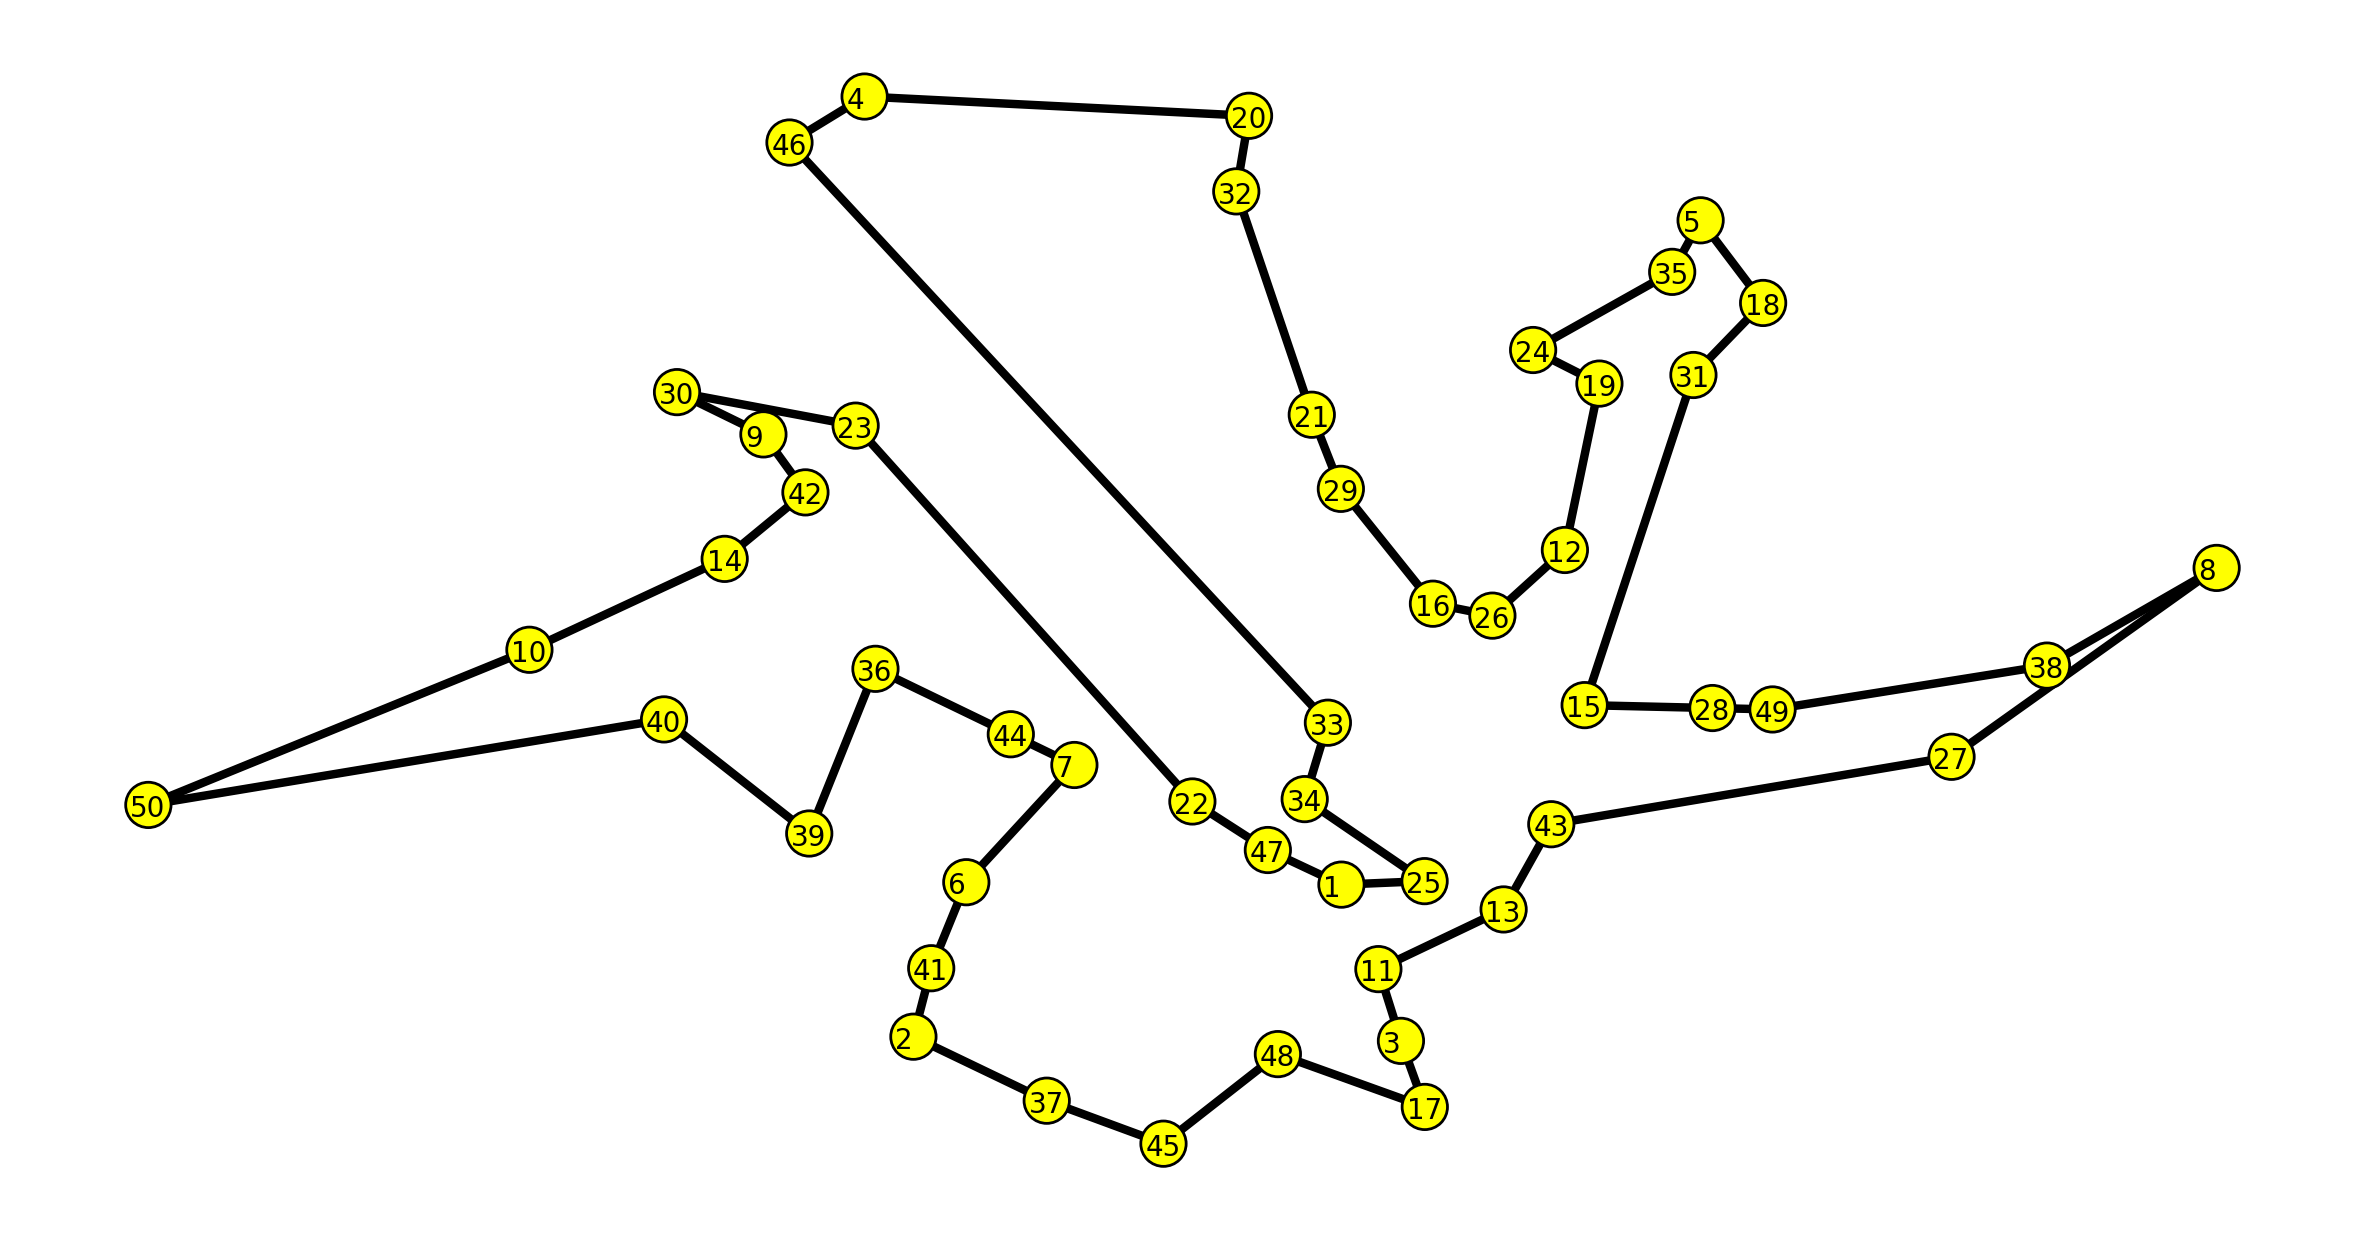

length of candidate TSP tour : 1532


In [120]:
# you can change this tour

candidate_tour = [
       4, 20, 32, 21, 29, 16, 26, 12, 19, 24, 
      35,  5, 18, 31, 15, 28, 49, 38,  8, 27, 
      43, 13, 11,  3, 17, 48, 45, 37,  2, 41,
       6,  7, 44, 36, 39, 40, 50, 10, 14, 42,  
       9, 30, 23, 22, 47,  1, 25, 34, 33, 46,
]

# auxiliary function that plots out a candidate TSP tour 
#                     and computes its length

L2 = TSP_plot(candidate_tour,cities_C1,posn_C1,dist_C1)

print("length of candidate TSP tour : {}".format(L2))


In [121]:
# auxiliary function that plots out a fractional TSP tour 
#   E  : list of edges with values one, and plotted in black 
#   fE : list of edges with fractional values, and plotted in red 


E = [
    (46,4), (4, 20), (20, 32), (32, 21) , (21, 29) , (29, 16) , (16, 26) , (26, 12) , (12, 19) , (19, 24) , 
    (24, 35) , (35, 5) , (5, 18) , (18, 31) , (31, 15) , (15, 28) , (28, 49) , (49, 38) , (38, 8) , (8, 27) ,
    (27, 43) , (43, 13) , (13,26), (11, 3) , (3, 17) , (17, 48) , (48, 45) , (45, 37) , 
    (37, 2) , (2, 41) , (41, 6) , (6, 7) , (7, 44) ,
    (44, 36) , (36, 39) , (39, 40) , (40, 50) , (50, 10) , (10, 14) , (14, 42) , (42, 9) , (9, 30) , (30, 23) , (23, 22) ,
    (22, 47) , (47, 1) , (1, 11) , 
    (25, 34) , (34, 33) , (33, 25) ,
]

fE = [
    (16,26), (26,12), (16,12), (46,23), (46,30), (23,30)
    
]

LL = frac_TSP_plot(E,fE,cities_C1,posn_C1,dist_C1)

print("length of fractional TSP tour : {}".format(LL))


NameError: name 'frac_TSP_plot' is not defined

## TSP C2

number of cities : 70


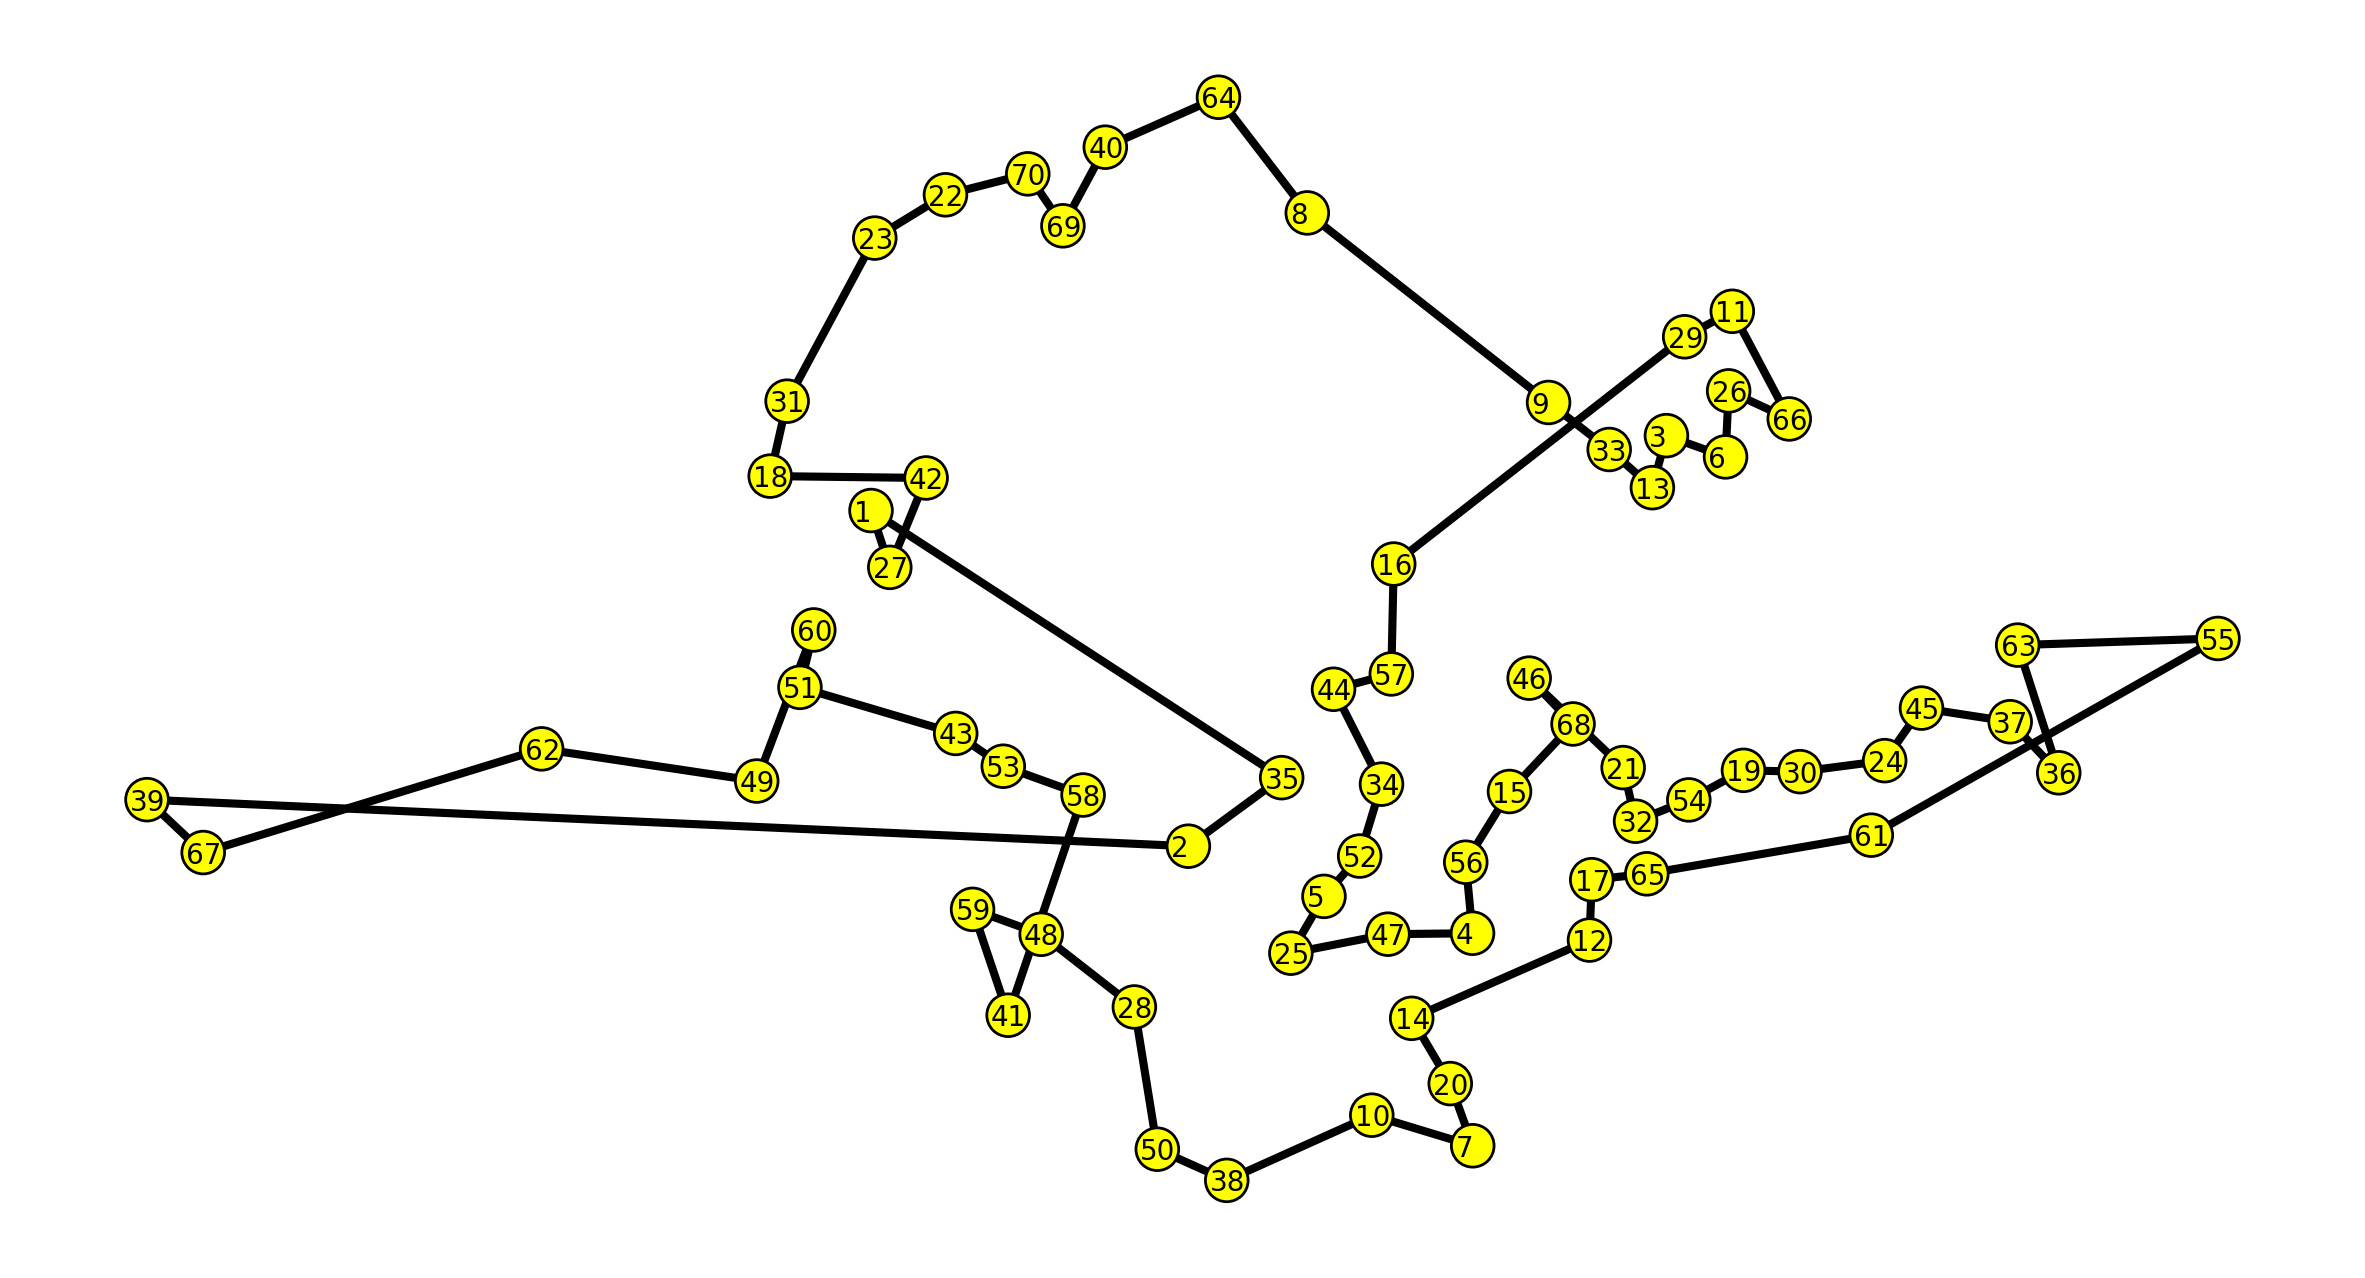

length of candidate TSP tour : 1707


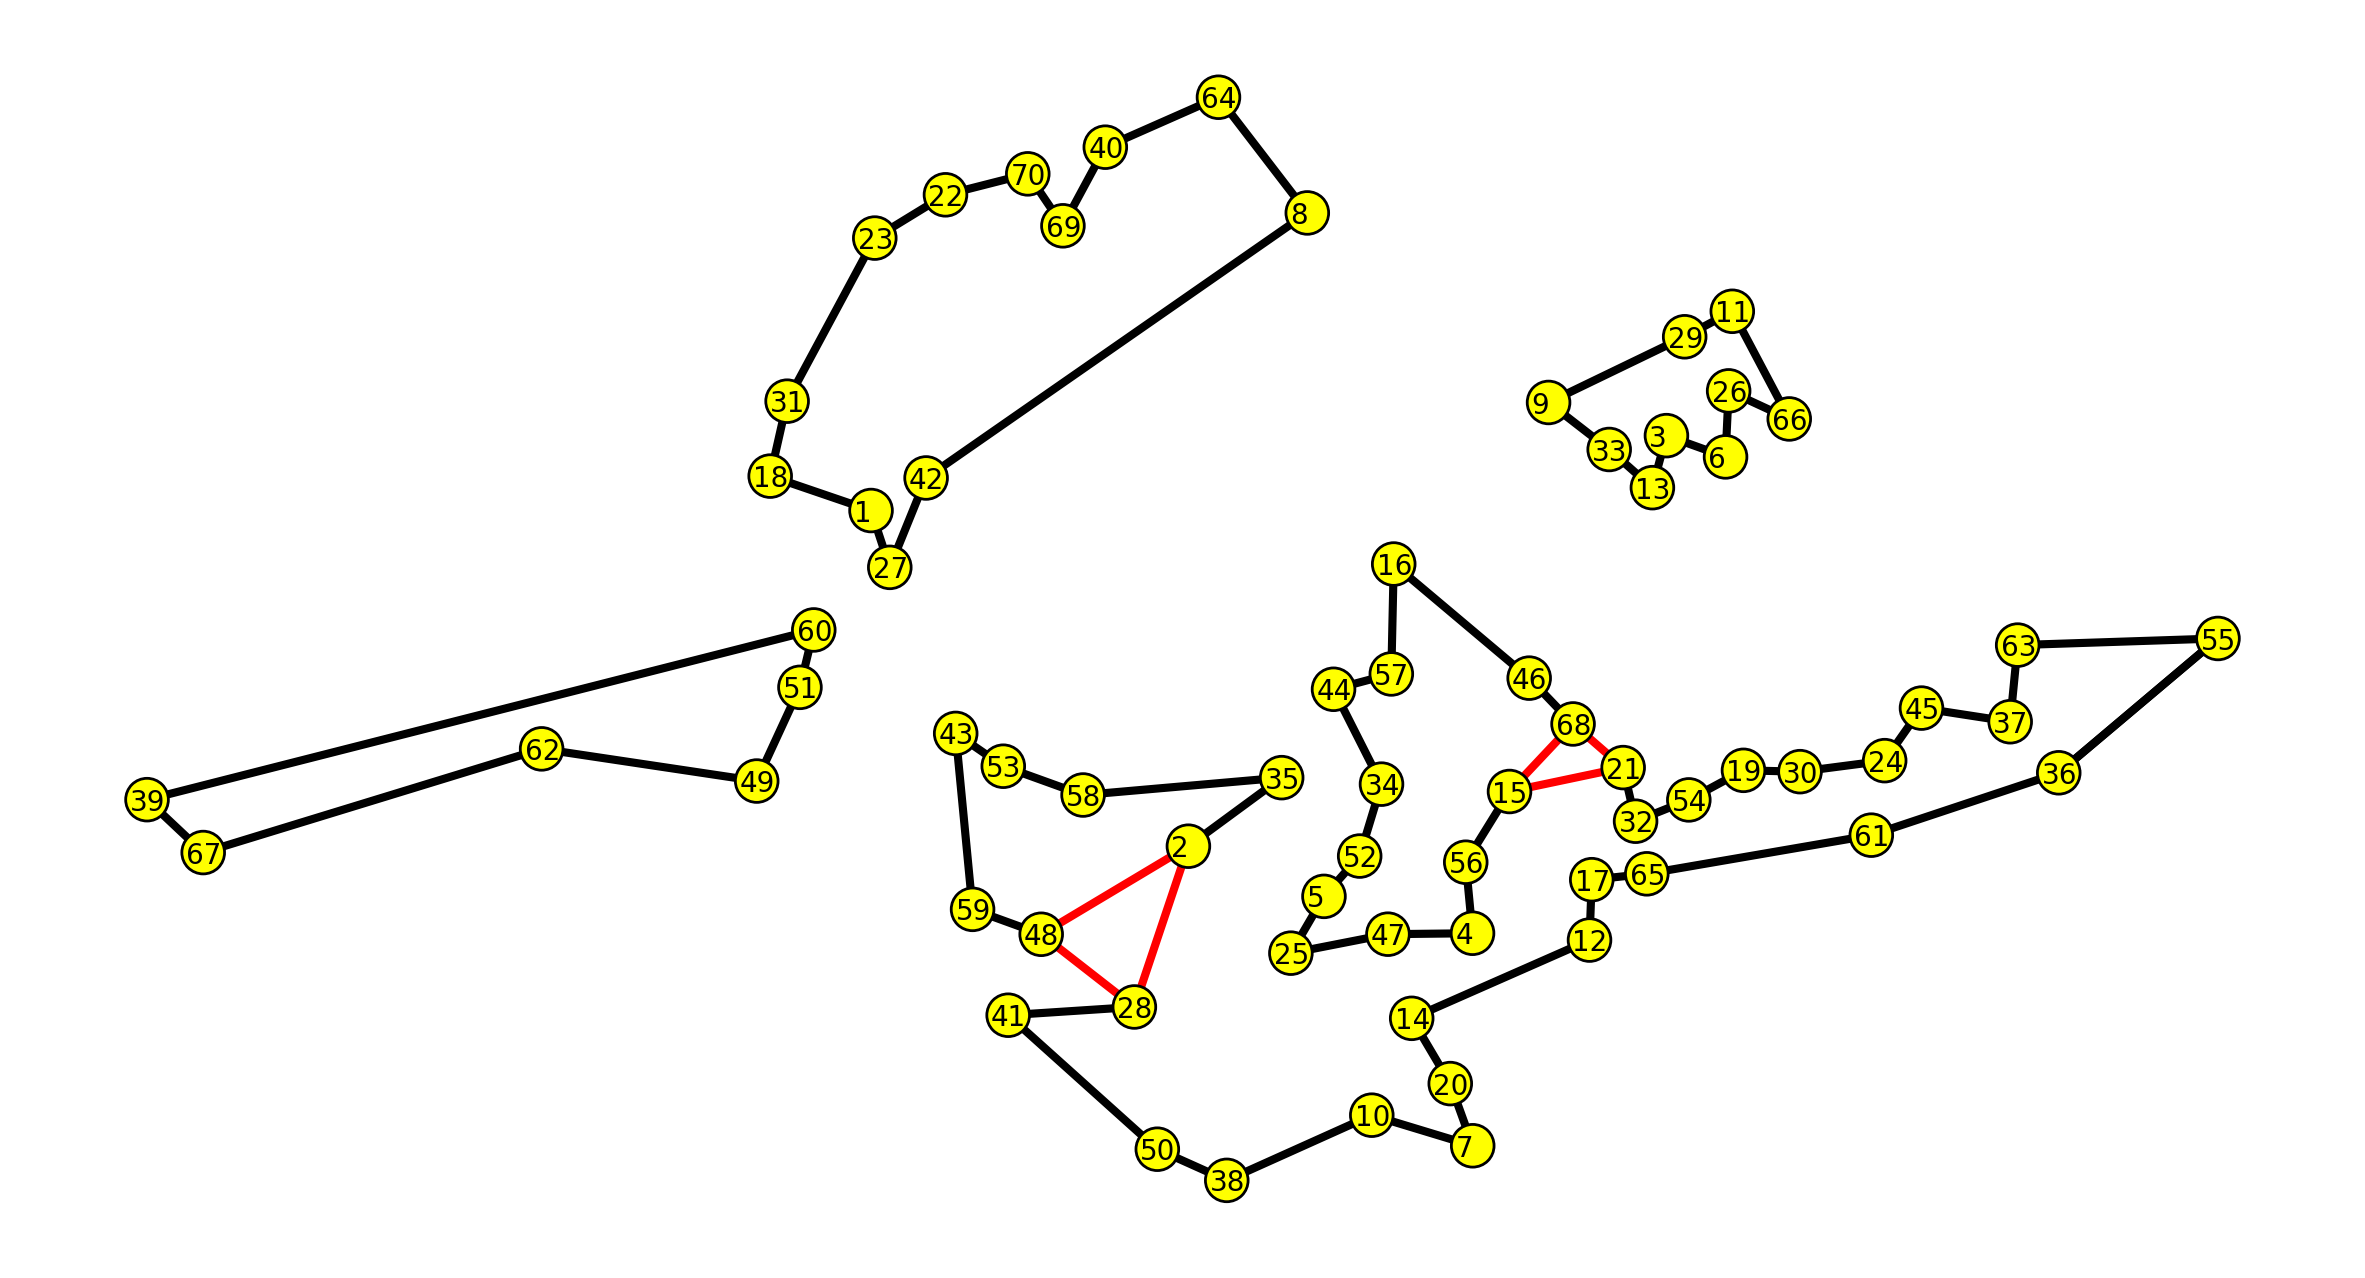

length of fractional TSP tour : 1581.5


In [14]:
# Question C2

from TSP_C2 import *
import pulp

print("number of cities : {}".format(len(cities_C2)))

# you can change this tour

candidate_tour = [
     1, 27, 42, 18, 31, 23, 22, 70, 69, 40, 
    64,  8,  9, 33, 13,  3,  6, 26, 66, 11, 
    29, 16, 57, 44, 34, 52,  5, 25, 47,  4, 
    56, 15, 68, 46, 21, 32, 54, 19, 30, 24,
    45, 37, 36, 63, 55, 61, 65, 17, 12, 14,
    20,  7, 10, 38, 50, 28, 48, 59, 41, 58, 
    53, 43, 51, 60, 49, 62, 67, 39, 2, 35
]


# auxiliary function that plots out a candidate TSP tour 
#                     and computes its length

L2 = TSP_plot(candidate_tour,cities_C2,posn_C2,dist_C2)

print("length of candidate TSP tour : {}".format(L2))

# auxiliary function that plots out a fractional TSP tour 
#   E  : list of edges with values one, and plotted in black 
#   fE : list of edges with fractional, and plotted in red 


E = [
    (18,1), (1,27), (27,42), (18,31), (31,23), (23,22), (22,70), (70,69), (69,40), (40,64), (64,8), (8,42),
    (9,33), (33,13), (13,3), (3,6), (6,26), (26,66), (66,11), (11,29), (29,9),
    (16,57), (57,44), (44,34), (34,52), (52,5), (5,25), (25,47), (47,4), (4,56), (56,15), (68,46), (46,16),
    (21,32),  (32,54), (54,19), (19,30), (30,24), (24,45), (45,37), (37,63), (36,55), (63,55), (55,36), (36,61),
    (61,65), (65,17), (17,12), (12,14), (14,20), (20,7), (7,10), (10,38), (38,50), (41,28), (48,59),
    (59,43), (41,50), (58,53), (53,43), 
    (51,60), (51,49), (49,62), (62,67), (67,39), (39,60), (2,35),(35,58),
]

fE = [
    (15,68), (15,21), (21,68), (2,48), (28,48), (2,28),
]

LL = frac_TSP_plot(E,fE,cities_C2,posn_C2,dist_C2)


print("length of fractional TSP tour : {}".format(LL))



# WRITE YOUR CODE HERE

---

## Auxilliary Plotting Functions

In [118]:
# Auxiliary function that
# plots out a candidate TSP tour 
# and computes its length


import matplotlib.pyplot as plt
import math as math
from matplotlib import collections as mc


def TSP_plot(tour,cities,posn,dist):
    fig = plt.figure()
    fig.set_dpi(200)
    fig.set_size_inches(15,30)

    r = 400
    xoffset=-0.8*r
    yoffset=-0.5*r
    displayname = 0

    for city in cities:

        center = posn[city]

        circle = plt.Circle(center, r, ec='black',fc='yellow', zorder = 9)
        plt.text(center[0]+xoffset,center[1]+yoffset,city, zorder=10)
        plt.gca().add_patch(circle)
    
    N = len(cities)
    
    L = 0
    for i in range(N):
        u = tour[i]
        if i<N-1: v = tour[i+1]
        else: v = tour[0]
            
        ux = posn[u][0]
        uy = posn[u][1]
        vx = posn[v][0]
        vy = posn[v][1]
        plt.arrow(ux,uy,vx-ux,vy-uy,color='k',width=100,head_width=0, zorder=1)
        
        L += dist[(u,v)]
        
    plt.axis('scaled')
    plt.axis('off')
    plt.show()
    
    return L

In [11]:
# Auxiliary functions that plots out a fractional TSP tour 
#   E  : list of edges with values one, and plotted in black 
#   fE : list of edges with fractional, and plotted in red 

import matplotlib.pyplot as plt
import math as math
from matplotlib import collections  as mc


def frac_TSP_plot(E,fE,cities,posn,dist):
    fig = plt.figure()
    fig.set_dpi(200)
    fig.set_size_inches(15,30)

    r = 400
    xoffset=-0.8*r
    yoffset=-0.5*r
    displayname = 0

    for city in cities:

        center = posn[city]

        circle = plt.Circle(center, r, ec='black',fc='yellow', zorder = 9)
        plt.text(center[0]+xoffset,center[1]+yoffset,city, zorder=10)
        plt.gca().add_patch(circle)
    
    L = 0
    
    for (u,v) in E:
        ux = posn[u][0]
        uy = posn[u][1]
        vx = posn[v][0]
        vy = posn[v][1]
        plt.arrow(ux,uy,vx-ux,vy-uy,color='k',width=100,head_width=0, zorder=1)
        
        L += dist[(u,v)]
    
    for (u,v) in fE:
        ux = posn[u][0]
        uy = posn[u][1]
        vx = posn[v][0]
        vy = posn[v][1]
        plt.arrow(ux,uy,vx-ux,vy-uy,color='red',width=100,head_width=0, zorder=1)
        
        L += 0.5*dist[(u,v)]
    
        
    plt.axis('scaled')
    plt.axis('off')
    plt.show()
    
    return L